In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('games.csv', on_bad_lines='skip')

display(df)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,price_discounted,discount,steam_deck
0,11190,Sherlock Holmes versus Jack the Ripper,2009-12-23,True,False,False,Mostly Positive,78,792,9.99,9.99,9.99,0.0,True
1,20700,Starscape,2008-11-03,True,False,False,Very Positive,81,80,7.99,7.99,7.99,0.0,True
2,94202,"Jamestown: Gunpowder, Treason, & Plot",2011-11-10,True,True,False,Positive,90,10,2.99,2.99,2.99,0.0,True
3,212673,Tom Clancy's Ghost Recon Future Soldier® - Khy...,2013-02-26,True,False,False,Mixed,60,10,9.99,9.99,9.99,0.0,True
4,222520,Champions of Regnum,2013-02-27,True,True,True,Mixed,67,1098,0.00,0.00,0.00,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13464,1760250,Madden NFL 23,2022-08-18,True,False,False,Mixed,49,2362,59.99,59.99,59.99,0.0,True
13465,1770640,Death's Gambit: Afterlife Soundtrack,2021-10-06,False,False,False,Positive,100,10,12.99,12.99,12.99,0.0,True
13466,1943950,Escape the Backrooms,2022-08-11,True,False,False,Very Positive,81,5726,9.99,9.99,9.99,0.0,True
13467,2124040,Department of the Devil,2022-10-24,True,False,False,Positive,100,12,7.99,7.99,7.99,0.0,True


### 2

In [4]:
shape = df.shape
print(f"В датасете {shape[0]} строк и {shape[1]} столбцов")

В датасете 13469 строк и 14 столбцов


In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13469 entries, 0 to 13468
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   app_id            13469 non-null  int64  
 1   title             13469 non-null  object 
 2   date_release      13469 non-null  object 
 3   win               13469 non-null  bool   
 4   mac               13469 non-null  bool   
 5   linux             13469 non-null  bool   
 6   rating            13469 non-null  object 
 7   positive_ratio    13469 non-null  int64  
 8   user_reviews      13469 non-null  int64  
 9   price_final       13469 non-null  float64
 10  price_original    13443 non-null  float64
 11  price_discounted  13443 non-null  float64
 12  discount          13469 non-null  float64
 13  steam_deck        13469 non-null  bool   
dtypes: bool(4), float64(4), int64(3), object(3)
memory usage: 1.1+ MB


None

In [6]:
dataset_statistics = [
    {'name': 'app_id',
     'what': 'айди игры',
     'type_variable': 'метрическая',
     'type_data': 'integer',
     'empty_count': 13469
     },
    {'name': 'title',
     'what': 'название игры',
     'type_variable': 'категориальная-номинальная',
     'type_data': 'string',
     'empty_count': 13469
     },
    {'name': 'date_release',
     'what': 'дату релиза игры',
     'type_variable': 'метрическая',
     'type_data': 'string',
     'empty_count': 13469
     },
    {'name': 'win',
     'what': 'поддержку операционной системы Windows',
     'type_variable': 'категориальная-бинарная',
     'type_data': 'bool',
     'empty_count': 13469
     },
    {'name': 'mac',
     'what': 'поддержку операционной системы MacOS',
     'type_variable': 'категориальная-бинарная',
     'type_data': 'bool',
     'empty_count': 13469
     },
    {'name': 'linux',
     'what': 'поддержку операционной системы Linus',
     'type_variable': 'категориальная-бинарная',
     'type_data': 'bool',
     'empty_count': 13469
     },
    {'name': 'rating',
     'what': 'категорию рейтинга продукта',
     'type_variable': 'категориальная-порядковая',
     'type_data': 'string',
     'empty_count': 13469
     },
    {'name': 'positive_ratio',
     'what': 'долю позитивных отзывов',
     'type_variable': 'метрическая',
     'type_data': 'integer',
     'empty_count': 13469
     },
    {'name': 'user_reviews',
     'what': 'количество оставленных отзывов',
     'type_variable': 'метрическая',
     'type_data': 'integer',
     'empty_count': 13469
     },
    {'name': 'price_final',
     'what': 'окончательную цену в долларах США $',
     'type_variable': 'метрическая',
     'type_data': 'float',
     'empty_count': 13469
     },
    {'name': 'price_original',
     'what': 'цену в долларах США $ до скидки',
     'type_variable': 'метрическая',
     'type_data': 'float',
     'empty_count': 13443
     },
    {'name': 'price_discounted',
     'what': 'цену в долларах США $ после скидки',
     'type_variable': 'метрическая',
     'type_data': 'float',
     'empty_count': 13443
     },
    {'name': 'discount',
     'what': 'значение скидки в процентах',
     'type_variable': 'метрическая',
     'type_data': 'float',
     'empty_count': 13469
     },
    {'name': 'steam_deck',
     'what': 'совместимость с Steam Deck',
     'type_variable': 'категориальная-бинарная',
     'type_data': 'bool',
     'empty_count': 13469
     },
    ]

In [7]:
for item in dataset_statistics:
    print(
        f'{item["name"]}: задаёт {item["what"]}, относится к типу переменной {item["type_variable"]}, относится к типу данных {item["type_data"]} и имеет {df.shape[0] - item["empty_count"]} пустых значений'
    )

app_id: задаёт айди игры, относится к типу переменной метрическая, относится к типу данных integer и имеет 0 пустых значений
title: задаёт название игры, относится к типу переменной категориальная-номинальная, относится к типу данных string и имеет 0 пустых значений
date_release: задаёт дату релиза игры, относится к типу переменной метрическая, относится к типу данных string и имеет 0 пустых значений
win: задаёт поддержку операционной системы Windows, относится к типу переменной категориальная-бинарная, относится к типу данных bool и имеет 0 пустых значений
mac: задаёт поддержку операционной системы MacOS, относится к типу переменной категориальная-бинарная, относится к типу данных bool и имеет 0 пустых значений
linux: задаёт поддержку операционной системы Linus, относится к типу переменной категориальная-бинарная, относится к типу данных bool и имеет 0 пустых значений
rating: задаёт категорию рейтинга продукта, относится к типу переменной категориальная-порядковая, относится к типу да

### 3

In [8]:
df = df.convert_dtypes()
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13469 entries, 0 to 13468
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   app_id            13469 non-null  Int64  
 1   title             13469 non-null  string 
 2   date_release      13469 non-null  string 
 3   win               13469 non-null  boolean
 4   mac               13469 non-null  boolean
 5   linux             13469 non-null  boolean
 6   rating            13469 non-null  string 
 7   positive_ratio    13469 non-null  Int64  
 8   user_reviews      13469 non-null  Int64  
 9   price_final       13469 non-null  Float64
 10  price_original    13443 non-null  Float64
 11  price_discounted  13443 non-null  Float64
 12  discount          13469 non-null  Int64  
 13  steam_deck        13469 non-null  boolean
dtypes: Float64(3), Int64(4), boolean(4), string(3)
memory usage: 1.2 MB


None

### 4

Добавим столбец задающий поддрежку игрой всех операционных систем и Steam Deck

In [9]:
df['all_platforms'] = df['win'] & df['mac'] & df['linux'] & df['steam_deck']
df['count_platforms'] = df['win'].astype(int) + df['mac'].astype(int) + df['linux'].astype(int) + df['steam_deck'].astype(int)

display(df['all_platforms'])
display(df['count_platforms'])

0        False
1        False
2        False
3        False
4         True
         ...  
13464    False
13465    False
13466    False
13467    False
13468    False
Name: all_platforms, Length: 13469, dtype: boolean

0        2
1        2
2        3
3        2
4        4
        ..
13464    2
13465    1
13466    2
13467    2
13468    2
Name: count_platforms, Length: 13469, dtype: int64

### 5

In [10]:
cheap = df['price_final'].quantile(0.25)
expensive = df['price_final'].quantile(0.80)
def f(x):
    if x < cheap:
        return 'Cheap'
    elif x < expensive:
        return 'Average'
    else:
        return 'Expensive'

df2 = df.copy()
df2['price_final'] = df2['price_final'].apply(lambda x : f(x))
display(df2)
print("Примем 25% самых недорогих чисел за дешёвые игры, а 20% самых недешёвых за дорогие, оставшиеся 55% игр имеют среднюю цену")

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,price_discounted,discount,steam_deck,all_platforms,count_platforms
0,11190,Sherlock Holmes versus Jack the Ripper,2009-12-23,True,False,False,Mostly Positive,78,792,Average,9.99,9.99,0,True,False,2
1,20700,Starscape,2008-11-03,True,False,False,Very Positive,81,80,Average,7.99,7.99,0,True,False,2
2,94202,"Jamestown: Gunpowder, Treason, & Plot",2011-11-10,True,True,False,Positive,90,10,Average,2.99,2.99,0,True,False,3
3,212673,Tom Clancy's Ghost Recon Future Soldier® - Khy...,2013-02-26,True,False,False,Mixed,60,10,Average,9.99,9.99,0,True,False,2
4,222520,Champions of Regnum,2013-02-27,True,True,True,Mixed,67,1098,Cheap,0.0,0.0,0,True,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13464,1760250,Madden NFL 23,2022-08-18,True,False,False,Mixed,49,2362,Expensive,59.99,59.99,0,True,False,2
13465,1770640,Death's Gambit: Afterlife Soundtrack,2021-10-06,False,False,False,Positive,100,10,Expensive,12.99,12.99,0,True,False,1
13466,1943950,Escape the Backrooms,2022-08-11,True,False,False,Very Positive,81,5726,Average,9.99,9.99,0,True,False,2
13467,2124040,Department of the Devil,2022-10-24,True,False,False,Positive,100,12,Average,7.99,7.99,0,True,False,2


Примем 25% самых недорогих чисел за дешёвые игры, а 20% самых недешёвых за дорогие, оставшиеся 55% игр имеют среднюю цену


### 6

In [11]:
sub = df[10:15]
display(sub.T)

,10,11,12,13,14
app_id,354680,364329,385870,396350,407980
title,Adventures of Bertram Fiddle 1: A Dreadly Busi...,FSX: Steam Edition - WACO YMF5 Add-On,Monstrum - Original Soundtrack,Bleed 2,Sakura Beach 2
date_release,2015-04-02,2015-07-14,2015-07-17,2017-02-08,2015-11-06
win,True,True,True,True,True
mac,True,False,True,True,False
linux,False,False,True,True,True
rating,Very Positive,Positive,Positive,Very Positive,Mostly Positive
positive_ratio,87,87,92,96,79
user_reviews,378,16,14,454,248
price_final,4.99,19.99,4.99,9.99,9.99


### 7

In [12]:
df = df.sort_values(by = ['positive_ratio', 'user_reviews', 'price_final'],ascending=[False, False, True])

display(df.head(20))

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,price_discounted,discount,steam_deck,all_platforms,count_platforms
449,992740,祈風 Inorikaze,2019-02-13,True,False,False,Very Positive,100,305,10.99,10.99,10.99,0,True,False,2
11209,1176050,秘封旅行 ~ Secret Sealing Travel,2020-10-17,True,False,False,Very Positive,100,183,4.49,5.99,4.49,25,True,False,2
1464,1290220,Elasto Mania Remastered,2020-05-25,True,False,False,Very Positive,100,171,9.99,9.99,9.99,0,True,False,2
9354,1082920,missed messages - Fan Pack,2019-05-28,True,True,True,Very Positive,100,124,4.99,4.99,4.99,0,True,True,4
9381,2205290,流光易逝的夏末 - Fleeting Summer's End,2023-01-06,True,False,False,Very Positive,100,121,2.99,2.99,2.99,0,True,False,2
876,862710,"Kid,napper - Extra Content",2018-05-31,True,True,True,Very Positive,100,117,0.99,0.99,0.99,0,True,True,4
12975,1796170,Bunny e-Shop The Art of the Game,2021-12-16,True,True,True,Very Positive,100,106,2.33,2.99,2.33,22,True,True,4
129,1727830,OPUS: Echo of Starsong Original Soundtrack -Be...,2021-08-31,False,False,False,Very Positive,100,100,7.99,7.99,7.99,0,True,False,1
13091,1028530,Paper Memories - Comics from Finding Paradise ...,2019-03-08,True,True,True,Very Positive,100,90,1.99,1.99,1.99,0,True,True,4
8957,1229060,Dungeon and Puzzles,2021-01-14,True,True,False,Very Positive,100,89,7.99,7.99,7.99,0,True,False,3


### 8

In [13]:
print("Цель исследования -- изучение рынка видеоигр на платформе Steam\n")

print("Задачи:\n- Сбор данных\n - Анализ данных на предмет взаимосвязи различных переменных")

Цель исследования -- изучение рынка видеоигр на платформе Steam

Задачи:
- Сбор данных
 - Анализ данных на предмет взаимосвязи различных переменных


### 9

In [70]:
print("Наши гипотезы:")
print("1. Чем игра дешевле игра, тем больше её скачивают, а значит и оставляют больше отзывов")
print("2. Игры стараются делать доступными для всех операционных систем")
print("3. Windows является наиболее популярной ОС и абсолютное болььшинство игр доступны на ней")
print("4. Чем старше игра, тем больше отзывов она имеет")
print("5. Чем старше игра, тем меньше операционных систем она поддерживает")
print("6. Цена игры со скидкой в среднем меньше финальной в полтора раза")
print("7. Чем больше отзывов имеет игра, тем больше среднеквадратическое отклонение отношения отзывов")
print("8. Чем дороже игра, тем больше платформ она поддерживает")
print("9. Бесплатные игры чаще поддерживают Linux, чем платные ввиду свободолюбивой политики пользователей линукса")
print("10. ")

Наши гипотезы:
1. Чем игра дешевле игра, тем больше её скачивают, а значит и оставляют больше отзывов
2. Игры стараются делать доступными для всех операционных систем
3. Windows является наиболее популярной ОС и абсолютное болььшинство игр доступны на ней
4. Чем старше игра, тем больше отзывов она имеет
5. Чем старше игра, тем меньше операционных систем она поддерживает
6. Цена игры со скидкой в среднем меньше финальной в полтора раза
7. Чем больше отзывов имеет игра, тем больше среднеквадратическое отклонение отношения отзывов


### 10

В среднем, чем выше цена игры, тем меньше отзывов на неё оставляют


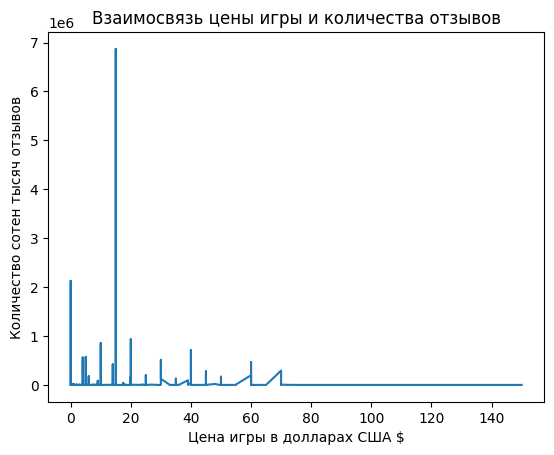

In [15]:
df3 = df.sort_values(by='price_final')

x = df3['price_final']
y = df3['user_reviews']

plt.title('Взаимосвязь цены игры и количества отзывов')
plt.xlabel('Цена игры в долларах США $')
plt.ylabel('Количество сотен тысяч отзывов')
plt.plot(x,y)
print('В среднем, чем выше цена игры, тем меньше отзывов на неё оставляют')

Большинство игры не поддерживают все платформы, причем среди поддерживающих большинство с самым высоким рейтингом. Соотношение рейтингов в среднем такое же, кроме Positive и Very Positive


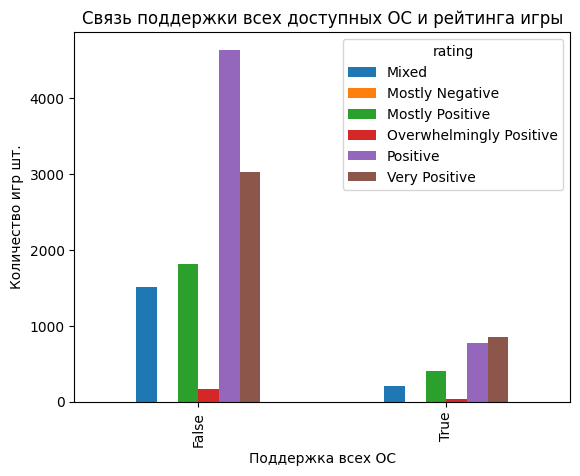

In [16]:
df.groupby('all_platforms')['rating'].value_counts().unstack().plot(kind='bar',title='Связь поддержки всех доступных ОС и рейтинга игры',ylabel = 'Количество игр шт.',xlabel='Поддержка всех ОС')

print("Большинство игры не поддерживают все платформы, причем среди поддерживающих большинство с самым высоким рейтингом. Соотношение рейтингов в среднем такое же, кроме Positive и Very Positive")

Абсолютное большинство игр выпускаются на Windows из чего можно сделать вывод, что это наиболее популярная ОС для игр


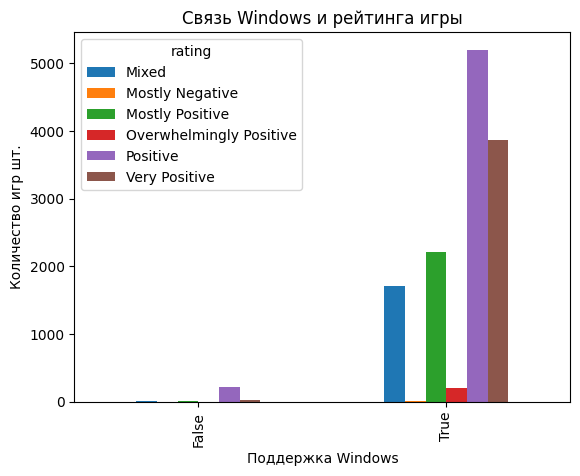

In [17]:
df.groupby('win')['rating'].value_counts().unstack().plot(kind='bar',title='Связь Windows и рейтинга игры',ylabel = 'Количество игр шт.',xlabel='Поддержка Windows')

print("Абсолютное большинство игр выпускаются на Windows из чего можно сделать вывод, что это наиболее популярная ОС для игр")

В среднем, новые игры имеют больше отзывов, значит люди менее охотно играют в старые игры


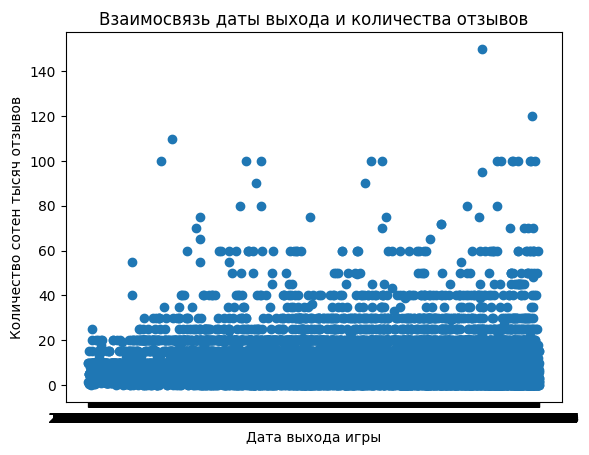

In [18]:
df3 = df.sort_values(by='date_release')

x = df3['date_release']
y = df3['price_final']

plt.title('Взаимосвязь даты выхода и количества отзывов')
plt.xlabel('Дата выхода игры')
plt.ylabel('Количество сотен тысяч отзывов')
plt.scatter(x,y)
print('В среднем, новые игры имеют больше отзывов, значит люди менее охотно играют в старые игры')

Чем младше игра, тем больше она в среднем поддерживает ОС


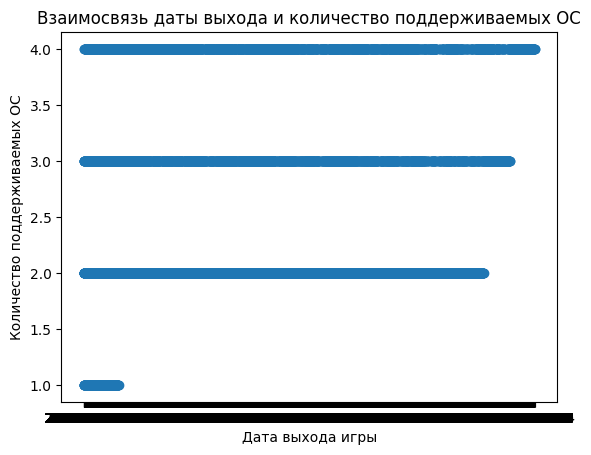

In [19]:
df3 = df.sort_values(by='count_platforms')

y = df3['count_platforms']
x = df3['date_release']

plt.title('Взаимосвязь даты выхода и количество поддерживаемых ОС')
plt.xlabel('Дата выхода игры')
plt.ylabel('Количество поддерживаемых ОС')
plt.scatter(x,y)
print('Чем младше игра, тем больше она в среднем поддерживает ОС')

### 11

In [20]:
# rating, win, mac, linux, steam_deck
# positive_ratio, user_reviews, price_final, price_original, price_discount, discount

In [24]:
df.pivot_table('positive_ratio', index='mac', columns='linux')

linux,False,True
mac,,
False,82.973113,86.428571
True,84.413278,84.490385


In [33]:
print("Игры, которые поддерживают Линукс в среднем оцениваются немного лучше, чем игры без поддержки Linux")

Игры, которые поддерживают Линукс в среднем оцениваются немного лучше, чем игры без поддержки Linux


In [31]:
df.pivot_table('price_final', index='rating', columns='win')

win,False,True
rating,,
Mixed,6.7825,11.546383
Mostly Negative,<NA>,11.561429
Mostly Positive,8.878889,10.225679
Overwhelmingly Positive,0.0,6.385291
Positive,6.229955,7.979161
Very Positive,5.381935,7.095131


In [29]:
print("Как можно заметить, вне зависимости от оценок пользователей, игры без поддержки системы Windows публикуются с меньшей ценой, чем игры с поддержкой ")

Как можно заметить, вне зависимости от оценок пользователей, игры без поддержки системы Windows публикуются с меньшей ценой, чем игры с поддержкой 


In [36]:
df.pivot_table('discount', index='rating', columns='mac', aggfunc=max)

mac,False,True
rating,,
Mixed,90,90
Mostly Negative,40,0
Mostly Positive,90,90
Overwhelmingly Positive,70,75
Positive,90,90
Very Positive,90,90


In [37]:
print("Вне зависимости от поддержки системы Mac, на очень негативно оцененные игры не делают скидок")

Вне зависимости от поддержки системы Mac, на очень негативно оцененные игры не делают скидок


### 12

In [47]:
df.describe()

,app_id,positive_ratio,user_reviews,price_final,price_original,price_discounted,discount,count_platforms
count,13469.0,13469.0,13469.0,13469.0,13443.0,13443.0,13469.0,13469.000000
mean,975663.524464,83.520974,2979.550375,8.48699,9.188369,8.492626,8.293043,2.475536
std,560834.015573,12.831449,70372.645415,9.346087,9.713703,9.348321,22.459214,0.793742
min,440.0,24.0,10.0,0.0,0.0,0.0,0.0,1.000000
25%,489460.0,77.0,20.0,2.49,2.99,2.49,0.0,2.000000
50%,910450.0,86.0,47.0,5.99,6.99,5.99,0.0,2.000000
75%,1419290.0,93.0,146.0,9.99,11.99,9.99,0.0,3.000000
max,2266310.0,100.0,6870243.0,149.99,199.99,149.99,90.0,4.000000


In [51]:
print("Описательная статистика для всего датасета")

Описательная статистика для всего датасета


In [50]:
df[df['all_platforms']].describe()

,app_id,positive_ratio,user_reviews,price_final,price_original,price_discounted,discount,count_platforms
count,2287.0,2287.0,2287.0,2287.0,2283.0,2283.0,2287.0,2287.0
mean,748226.386095,84.490162,6986.205072,7.619121,8.293925,7.618029,6.383035,4.0
std,479939.420983,11.798978,153823.558813,7.673548,9.123954,7.676899,20.383425,0.0
min,440.0,24.0,10.0,0.0,0.0,0.0,0.0,4.0
25%,373710.0,79.0,25.0,2.99,3.99,2.99,0.0,4.0
50%,596890.0,87.0,66.0,5.99,6.99,5.99,0.0,4.0
75%,1024550.0,93.0,206.0,9.99,9.99,9.99,0.0,4.0
max,2246700.0,100.0,6870243.0,99.99,199.99,99.99,90.0,4.0


In [ ]:
print("Описательная статистика для игр, поддерживающих все платформы")

In [49]:
df['price_final'].median()

5.99

In [ ]:
print("Средняя цена по рынку видеоигр равна 6 долларам")

In [53]:
df['price_final'].mean()

8.486990125473309

In [54]:
print("Среднее арфиметиеское цены больше, чем его медиана. Возможно, это вызвано большим количеством дорогих игр")

Среднее арфиметиеское цены больше, чем его медиана. Возможно, это вызвано большим количеством дорогих игр


In [56]:
df[df['price_final'] > 5.99].count()

app_id              6257
title               6257
date_release        6257
win                 6257
mac                 6257
linux               6257
rating              6257
positive_ratio      6257
user_reviews        6257
price_final         6257
price_original      6256
price_discounted    6256
discount            6257
steam_deck          6257
all_platforms       6257
count_platforms     6257
dtype: int64

In [57]:
df[df['price_final'] <= 5.99].count()

app_id              7212
title               7212
date_release        7212
win                 7212
mac                 7212
linux               7212
rating              7212
positive_ratio      7212
user_reviews        7212
price_final         7212
price_original      7187
price_discounted    7187
discount            7212
steam_deck          7212
all_platforms       7212
count_platforms     7212
dtype: int64

In [58]:
print("Оказалось наоборот, игр меьнше медианы больше. Из чего можно сделать вывод - среднее арифметическое больше медианы потому, что самые дорогие игры сильно дороже среднего и именно за счет них среднее арифметическое повышается")

Оказалось наоборот, игр меьнше медианы больше. Из чего можно сделать вывод - среднее арифметическое больше медианы потому, что самые дорогие игры сильно дороже среднего и именно за счет них среднее арифметическое повышается


In [60]:
df[df['discount'] > 0]['discount'].mode()

0    50
Name: discount, dtype: Int64

In [63]:
print("Самая часто встречающееся зачение скидки помимо 0 - 50%")

Самая часто встречающееся зачение скидки помимо 0 - 50%


In [64]:
df['positive_ratio'].std()

12.831448632713137

In [65]:
print("Среднеквадратичное отклонение процента пользовательских отзывов. Можно сделать вывод, что, как правило, отношение не сильно отличается от среднего")

Среднеквадратичное отклонение процента пользовательских отзывов. Можно сделать вывод, что, как правило, отношение не сильно отличается от среднего


In [68]:
df['count_platforms'].var()

0.6300259317929522

In [69]:
print("Большинство производителей стараются поддерживать как можно больше платформ")

Большинство производителей стараются поддерживать как можно больше платформ


### 13

<AxesSubplot:>

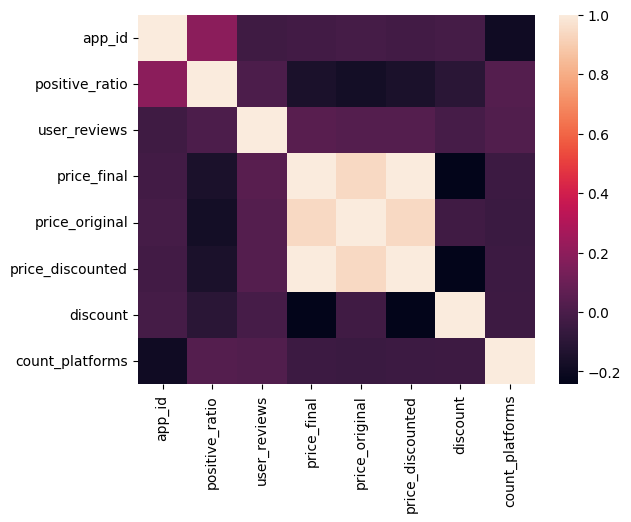

In [45]:
import seaborn as sns

sns.heatmap(df.select_dtypes('number').corr())

In [46]:
print("Как ни странно, существует прямая зависимость между изначальной ценой, ценой со скидкой и финальной ценой. Это обуславливается тем, что скидку делают в процентах, а не в абсолютных единицах.")

Как ни странно, существует прямая зависимость между изначальной ценой, ценой со скидкой и финальной ценой. Это обуславливается тем, что скидку делают в процентах, а не в абсолютных единицах.


### 14

### 15